In [1]:
import pandas as pd

# 1. 加载数据
data = pd.read_csv('data.csv')

# 查看数据的前几行
print("原始数据预览:")
print(data.head())

# 2. 处理缺失值
# 检查缺失值
print("\n缺失值统计:")
print(data.isnull().sum())

# 填充缺失值
# 数值型数据：使用均值填充
data['Quantity'].fillna(data['Quantity'].mean(), inplace=True)
data['Price'].fillna(data['Price'].mean(), inplace=True)

# 类别型数据：使用众数填充
data['CustomerID'].fillna(data['CustomerID'].mode()[0], inplace=True)
data['Country'].fillna(data['Country'].mode()[0], inplace=True)

# 3. 转换数据类型
# 确保日期列为 datetime 类型
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # 'coerce' 会将无效日期转为 NaT
# 将 Quantity 和 Price 列转换为数值类型
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# 4. 去除重复值
# 检查重复值
print("\n重复值统计:")
print(data.duplicated().sum())

# 删除重复值
data.drop_duplicates(inplace=True)

# 5. 处理异常值
# 假设 Quantity 和 Price 不能为负数
data = data[data['Quantity'] >= 0]
data = data[data['Price'] >= 0]

# 6. 特征工程
# 提取日期特征：年、月、日、星期几
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday  # 0=Monday, 6=Sunday

# 价格归一化（可选）
data['Price_normalized'] = (data['Price'] - data['Price'].min()) / (data['Price'].max() - data['Price'].min())

# 7. 编码类别变量
# 使用标签编码对 'Country' 进行编码
data['Country'] = data['Country'].astype('category').cat.codes

# 如果需要独热编码，可以使用 pd.get_dummies
# data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# 8. 保存预处理后的数据
data.to_csv('processed_data.csv', index=False)

print("\n数据预处理完成，已保存到 'processed_data.csv'.")


原始数据预览:
   EventID ProductID                              Product  Quantity  \
0        1    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        2     71053                  WHITE METAL LANTERN         6   
2        3    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        4    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        5    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

            Date  Price  CustomerID Country  
0  2/1/2024 8:26   25.5     17850.0   China  
1  2/1/2024 8:26   33.9     17850.0   China  
2  2/1/2024 8:26   27.5     17850.0   China  
3  2/1/2024 8:26   33.9     17850.0   China  
4  2/1/2024 8:26   33.9     17850.0   China  

缺失值统计:
EventID            0
ProductID          0
Product         1454
Quantity           0
Date               0
Price              0
CustomerID    135080
Country            0
dtype: int64

重复值统计:


C:\Users\86152\AppData\Local\Temp\ipykernel_23212\3304575861.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity'].fillna(data['Quantity'].mean(), inplace=True)
C:\Users\86152\AppData\Local\Temp\ipykernel_23212\3304575861.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

0

数据预处理完成，已保存到 'processed_data.csv'.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Matplotlib 使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 1. 加载数据
data = pd.read_csv('data.csv')

# 2. 查看数据的基本信息
print("数据基本信息：")
print(data.info())

# 查看前几行数据
print("\n数据预览：")
print(data.head())

# 3. 描述性统计分析
print("\n描述性统计分析：")
print(data.describe())

# 4. 检查缺失值
print("\n缺失值统计：")
print(data.isnull().sum())

# 5. 转换数据类型
# 确保 'Date' 为 datetime 类型
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# 6. 检查重复值
print("\n重复值统计：")
print(data.duplicated().sum())

# 7. 计算每个顾客的总交易金额、交易频率、交易次数等
# 创建顾客特征：总交易金额、总购买次数、购买频率
customer_data = data.groupby('CustomerID').agg(
    total_spent=('Price', 'sum'),
    total_quantity=('Quantity', 'sum'),
    total_orders=('EventID', 'nunique'),
    purchase_frequency=('EventID', 'count'),
    average_order_value=('Price', 'mean')
).reset_index()

# 8. 交易金额分布
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['total_spent'], kde=True, bins=30, color='skyblue')
plt.title('顾客总交易金额分布')
plt.xlabel('总交易金额')
plt.ylabel('顾客数')
plt.savefig('total_spent_distribution.png', bbox_inches='tight')  # 保存图表
plt.close()  # 关闭当前图表，避免覆盖

# 9. 交易频率分布
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['purchase_frequency'], kde=True, bins=30, color='orange')
plt.title('顾客交易频率分布')
plt.xlabel('交易频率')
plt.ylabel('顾客数')
plt.savefig('purchase_frequency_distribution.png', bbox_inches='tight')  # 保存图表
plt.close()

# 10. 交易金额与购买频率的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='purchase_frequency', y='total_spent', color='green')
plt.title('交易频率与总交易金额的关系')
plt.xlabel('交易频率')
plt.ylabel('总交易金额')
plt.savefig('purchase_frequency_vs_total_spent.png', bbox_inches='tight')  # 保存图表
plt.close()

# 11. 不同国家顾客的购买行为分析
country_data = data.groupby('Country').agg(
    total_spent=('Price', 'sum'),
    total_quantity=('Quantity', 'sum'),
    total_orders=('EventID', 'nunique'),
    purchase_frequency=('EventID', 'count')
).reset_index()

# 绘制不同国家的购买金额
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='total_spent', data=country_data, palette='Set2')
plt.title('不同国家的总交易金额')
plt.xlabel('国家')
plt.ylabel('总交易金额')
plt.xticks(rotation=45)
plt.savefig('total_spent_by_country.png', bbox_inches='tight')  # 保存图表
plt.close()

# 12. 根据交易金额进行客户分群
# 假设我们使用总交易金额进行简单分群（可以后续使用更复杂的算法）
customer_data['spending_group'] = pd.qcut(customer_data['total_spent'], q=4, labels=['低', '中', '高', '超高'])

# 查看每个分群的客户数量
print("\n顾客分群：")
print(customer_data['spending_group'].value_counts())

# 13. 计算每个顾客的交易时间分布
customer_data['first_purchase'] = data.groupby('CustomerID')['Date'].min().reset_index(drop=True)
customer_data['last_purchase'] = data.groupby('CustomerID')['Date'].max().reset_index(drop=True)
customer_data['days_between'] = (customer_data['last_purchase'] - customer_data['first_purchase']).dt.days

# 14. 可视化顾客的交易生命周期
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['days_between'], kde=True, bins=30, color='purple')
plt.title('顾客交易生命周期分布')
plt.xlabel('交易生命周期（天）')
plt.ylabel('顾客数')
plt.savefig('customer_lifecycle_distribution.png', bbox_inches='tight')  # 保存图表
plt.close()

# 15. 总结分析结果
print("\n数据分析总结：")
print(f"顾客总数：{customer_data.shape[0]}")
print(f"交易金额最高的顾客：{customer_data.loc[customer_data['total_spent'].idxmax()]['CustomerID']}")
print(f"交易金额最低的顾客：{customer_data.loc[customer_data['total_spent'].idxmin()]['CustomerID']}")


数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   EventID     541910 non-null  int64  
 1   ProductID   541910 non-null  object 
 2   Product     540456 non-null  object 
 3   Quantity    541910 non-null  int64  
 4   Date        541910 non-null  object 
 5   Price       541910 non-null  float64
 6   CustomerID  406830 non-null  float64
 7   Country     541910 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 33.1+ MB
None

数据预览：
   EventID ProductID                              Product  Quantity  \
0        1    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        2     71053                  WHITE METAL LANTERN         6   
2        3    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        4    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        5    84029E       RED W

C:\Users\86152\AppData\Local\Temp\ipykernel_23212\3183892158.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='total_spent', data=country_data, palette='Set2')



顾客分群：
spending_group
低     1093
中     1093
高     1093
超高    1093
Name: count, dtype: int64

数据分析总结：
顾客总数：4372
交易金额最高的顾客：14096.0
交易金额最低的顾客：13256.0


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

# 1. 加载数据
data = pd.read_csv('processed_data.csv')

# 2. 数据预处理
# 确保 'Date' 为 datetime 类型
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# 3. 计算 RFM 指标
# 计算 Recency、Frequency 和 Monetary
current_date = data['Date'].max()  # 获取最新的购买日期

# Recency：最近一次购买距今的天数
rfm_data = data.groupby('CustomerID').agg(
    recency=('Date', lambda x: (current_date - x.max()).days),
    frequency=('EventID', 'nunique'),  # 购买的次数
    monetary=('Price', 'sum')  # 消费总金额
).reset_index()

# 4. 对 RFM 进行评分
# 按照 Recency、Frequency 和 Monetary 进行分箱（评分）
rfm_data['recency_score'] = pd.qcut(rfm_data['recency'], 5, labels=False) + 1
rfm_data['frequency_score'] = pd.qcut(rfm_data['frequency'], 5, labels=False) + 1
rfm_data['monetary_score'] = pd.qcut(rfm_data['monetary'], 5, labels=False) + 1

# 5. 计算 RFM 总分
rfm_data['rfm_score'] = rfm_data['recency_score'] + rfm_data['frequency_score'] + rfm_data['monetary_score']

# 6. 客户生命周期价值（CLV）预测（简单模型）
# 假设CLV = (每次交易的平均消费 * 交易频率 * 客户生命周期预测)
# 这里我们使用历史的平均消费来估算每次交易的金额
rfm_data['avg_order_value'] = rfm_data['monetary'] / rfm_data['frequency']
rfm_data['clv'] = rfm_data['avg_order_value'] * rfm_data['frequency'] * rfm_data['recency']

# 7. 客户分类
# 根据 RFM 总分进行客户分群
rfm_data['customer_segment'] = pd.cut(rfm_data['rfm_score'], bins=[0, 5, 8, 11, 15], labels=['低价值', '中低价值', '中高价值', '高价值'])

# 8. 根据 RFM 分数推荐代金券
# 设定规则：高价值客户赠送大额代金券，中低价值客户赠送小额代金券
rfm_data['coupon_recommendation'] = rfm_data['customer_segment'].map({
    '低价值': '无代金券',
    '中低价值': '小额代金券',
    '中高价值': '中等代金券',
    '高价值': '大额代金券'
})

# 9. 结果展示
# 查看每个客户的 RFM 分数、CLV 和推荐的代金券
print(rfm_data[['CustomerID', 'recency', 'frequency', 'monetary', 'rfm_score', 'clv', 'customer_segment', 'coupon_recommendation']])

# 10. 保存结果到文件
rfm_data.to_csv('customer_value_analysis.csv', index=False)

print("\n客户价值分析结果已保存到 'customer_value_analysis.csv'")


      CustomerID  recency  frequency  monetary  rfm_score        clv  \
0        12346.0    400.0          1      10.4        7.0     4160.0   
1        12347.0     15.0        182    4812.1       11.0    72181.5   
2        12348.0      5.0         31    1787.1        8.0     8935.5   
3        12349.0     93.0         73    6051.0       11.0   562743.0   
4        12350.0    385.0         17     653.0        9.0   251405.0   
...          ...      ...        ...       ...        ...        ...   
4334     18280.0    380.0         10     476.5        8.0   181070.0   
4335     18281.0    265.0          7     393.6        7.0   104304.0   
4336     18282.0    201.0         12     623.9        7.0   125403.9   
4337     18283.0     84.0        756   12209.3       12.0  1025581.2   
4338     18287.0    117.0         70    1045.5       10.0   122323.5   

     customer_segment coupon_recommendation  
0                中低价值                 小额代金券  
1                中高价值                 中等代金券

In [6]:
import pandas as pd
ddd=pd.read_csv('customer_value_analysis.csv')
ddd

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,avg_order_value,clv,customer_segment,coupon_recommendation
0,12346.0,400.0,1,10.4,5.0,1,1,7.0,10.400000,4160.0,中低价值,小额代金券
1,12347.0,15.0,182,4812.1,1.0,5,5,11.0,26.440110,72181.5,中高价值,中等代金券
2,12348.0,5.0,31,1787.1,1.0,3,4,8.0,57.648387,8935.5,中低价值,小额代金券
3,12349.0,93.0,73,6051.0,2.0,4,5,11.0,82.890411,562743.0,中高价值,中等代金券
4,12350.0,385.0,17,653.0,5.0,2,2,9.0,38.411765,251405.0,中高价值,中等代金券
...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,380.0,10,476.5,5.0,1,2,8.0,47.650000,181070.0,中低价值,小额代金券
4335,18281.0,265.0,7,393.6,5.0,1,1,7.0,56.228571,104304.0,中低价值,小额代金券
4336,18282.0,201.0,12,623.9,4.0,1,2,7.0,51.991667,125403.9,中低价值,小额代金券
4337,18283.0,84.0,756,12209.3,2.0,5,5,12.0,16.149868,1025581.2,高价值,大额代金券


C:\Users\86152\AppData\Local\Temp\ipykernel_36436\1130119378.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_lifecycles['lifecycle_days'], shade=True, color='b')


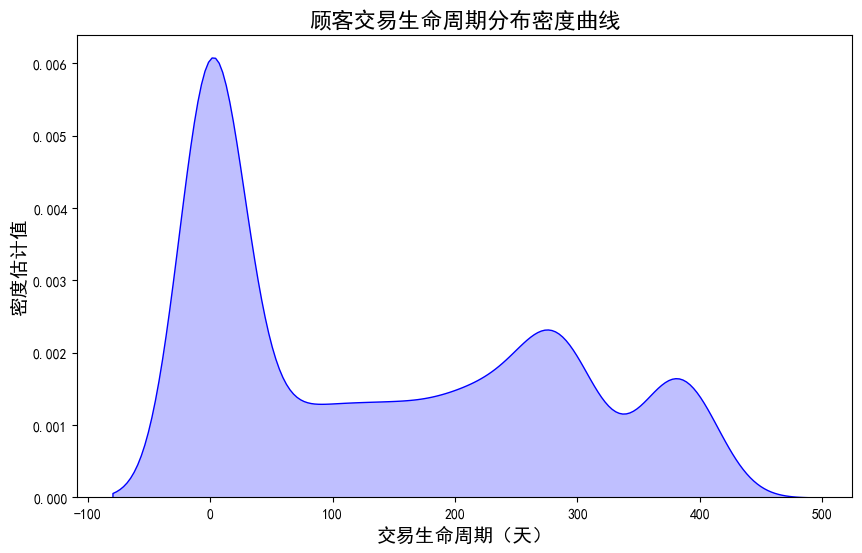

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体（例如：SimHei）
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 支持中文
matplotlib.rcParams['axes.unicode_minus'] = False   # 支持负号

# 假设数据已经加载为 DataFrame df
df = pd.read_csv('processed_data.csv')

# 转换日期列为datetime格式
df['Date'] = pd.to_datetime(df['Date'])

# 计算每个顾客的第一次和最后一次交易日期
customer_lifecycles = df.groupby('CustomerID')['Date'].agg(['min', 'max'])

# 计算每个顾客的交易生命周期（天数）
customer_lifecycles['lifecycle_days'] = (customer_lifecycles['max'] - customer_lifecycles['min']).dt.days

# 绘制顾客交易生命周期分布密度曲线
plt.figure(figsize=(10, 6))
sns.kdeplot(customer_lifecycles['lifecycle_days'], shade=True, color='b')

# 添加标题和标签
plt.title('顾客交易生命周期分布密度曲线', fontsize=16)
plt.xlabel('交易生命周期（天）', fontsize=14)
plt.ylabel('密度估计值', fontsize=14)

# 显示图表
plt.show()
